In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np

# DecisionTreeClassifier

In [ ]:
# Model DecisionTreeClassifier

df_class = pd.read_csv("diabetes.csv")

df_class.head()

df_class.info()

# Target and Features
y = df_class['Outcome']

X = df_class.drop('Outcome', axis=1)

# Model 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

from sklearn.tree import DecisionTreeClassifier

#Modele instantiation
dt_clf = DecisionTreeClassifier(random_state=42)

#Modele training 
dt_clf.fit(X_train, y_train)

#Prediction on test data
y_pred_test = dt_clf.predict(X_test)

print(y_pred_test[:5])

# --------  Elle accuracy hesaplama --------------
dictP = {'y_test' : y_test,
        'y_prediction' : y_pred_test,
        'tf' : y_test == y_pred_test}
df_p = pd.DataFrame(dictP)

df_p.head()

true_pred_count = df_p.loc[df_p.tf == True].count()[0]
total_pred_count = df_p.count()[0]

score = true_pred_count / total_pred_count
print("Accuracy = ",score)
# ------------------------------------------------

print("score train : " , dt_clf.score(X_train, y_train))

print("score test : ", dt_clf.score(X_test,y_test))

# DecisionTreeRegressor

In [ ]:
# Model DecisionTreeRegressor

df_reg = pd.read_csv('carPrice.csv', index_col = 0)

df_reg.head()

df_reg.info()

# Target 
y = df_reg['price']

X = df_reg.drop('price', axis = 1)

# Model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

#Model instantiation
dt_reg = DecisionTreeRegressor(random_state=42)

#Model training 
dt_reg.fit(X_train, y_train)

#Prediction on test data 
y_pred_test = dt_reg.predict(X_test)

print(y_pred_test[:5])

# --------------------Elle fark bulma---------------------------
y_test_mean = np.mean(y_test)

dictP = {'y_test' : y_test,
        'y_prediction' : y_pred_test,
        'difference' : abs(y_test - y_pred_test),
        'dif_percent' : (abs(y_test - y_pred_test) / y_test) * 100,
        'test_mean' : y_test_mean}

df_p = pd.DataFrame(dictP)

df_p.head()

# -----------------------------------------------
print("score train : " , dt_reg.score(X_train, y_train))

print("score test : ", dt_reg.score(X_test, y_test))

In [2]:
path = '/Volumes/SD512/indirilenler_SD_Card'

In [40]:
import pandas as pd

df = pd.read_csv(f'{path}/titanic.csv', index_col=0)

df = df.drop(['Cabin', 'Name', 'Ticket'], axis=1)

df = df.dropna(subset=['Age'])

df['Sex'] = df['Sex'].map({'male' : 0, 'female' :1})

df.Embarked.fillna('S', inplace=True)

df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

df[['Embarked_S', 'Embarked_C', 'Embarked_Q']] = df[['Embarked_S', 'Embarked_C', 'Embarked_Q']].astype(int)

df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,0,3,0,22.0,1,0,7.2500,0,0,1
2,1,1,1,38.0,1,0,71.2833,1,0,0
3,1,3,1,26.0,0,0,7.9250,0,0,1
4,1,1,1,35.0,1,0,53.1000,0,0,1
5,0,3,0,35.0,0,0,8.0500,0,0,1


# DecisionTreeClassifier Titanic

535 535 179 179
Score on train set 0.8168224299065421
Score on test set 0.7597765363128491

--------------------- Plot_Tree ---------------------


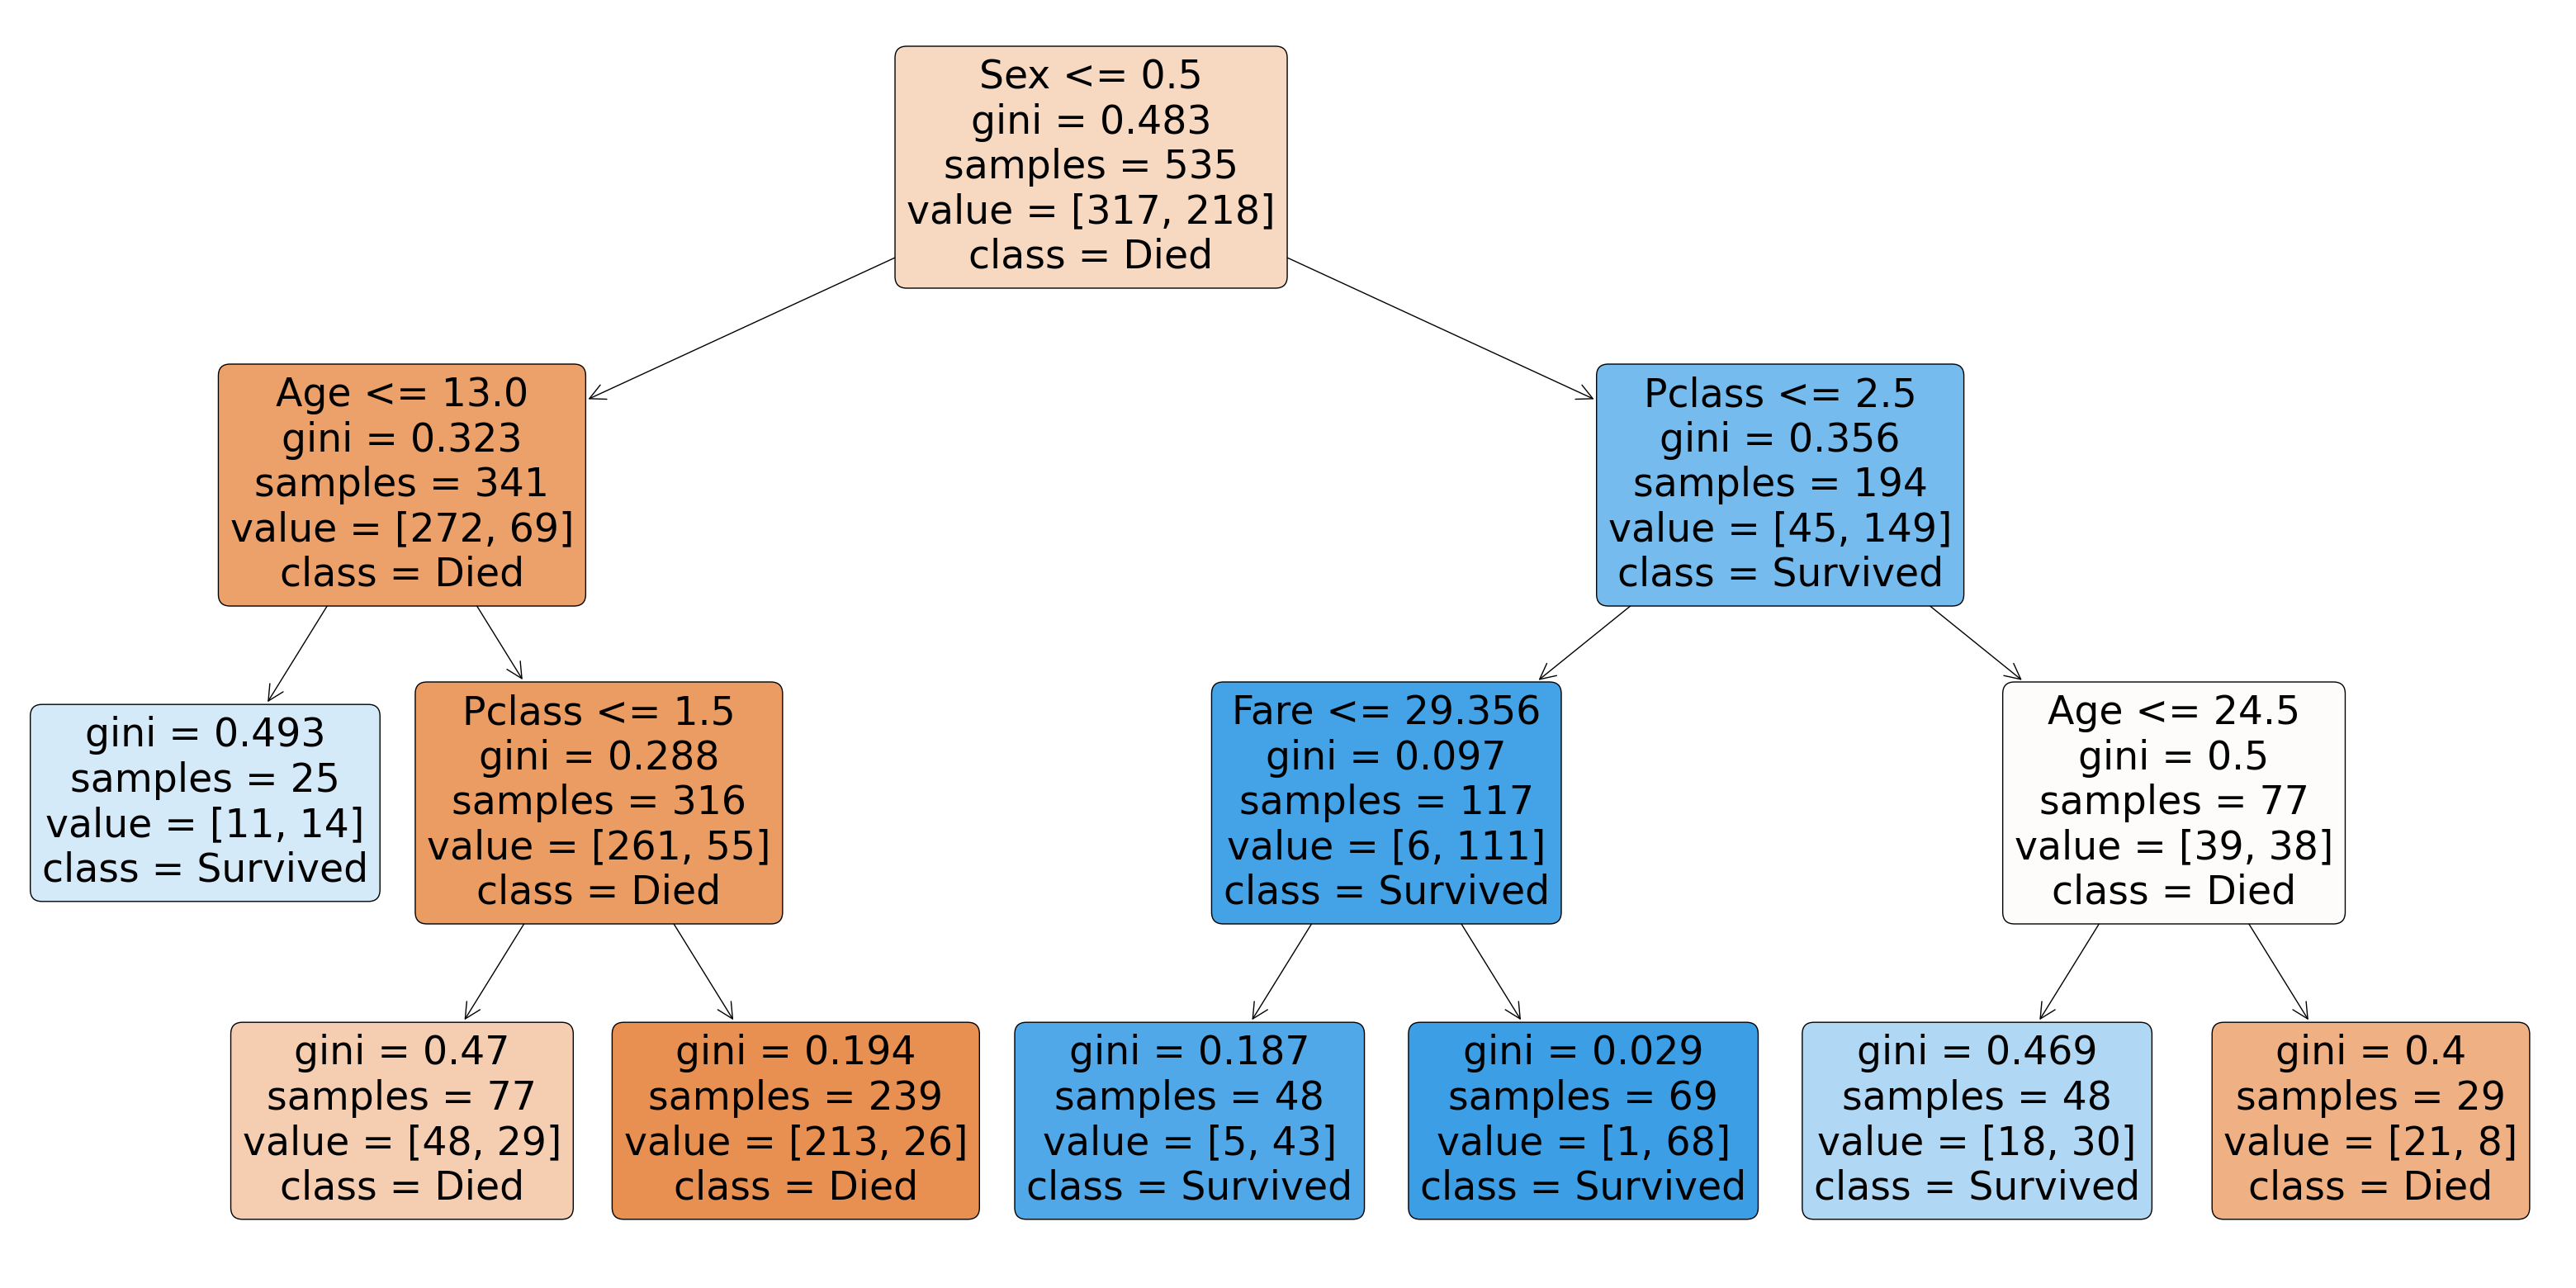


--------------------- Feature_importances ---------------------

feats.columns = Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

feature_importances_ = [0.23290931 0.66781796 0.09543099 0.         0.         0.00384174
 0.         0.         0.        ]

DF feat_importances
    Variables  Importance
1         Sex    0.667818
0      Pclass    0.232909
2         Age    0.095431
5        Fare    0.003842
3       SibSp    0.000000
4       Parch    0.000000
6  Embarked_C    0.000000
7  Embarked_Q    0.000000
8  Embarked_S    0.000000


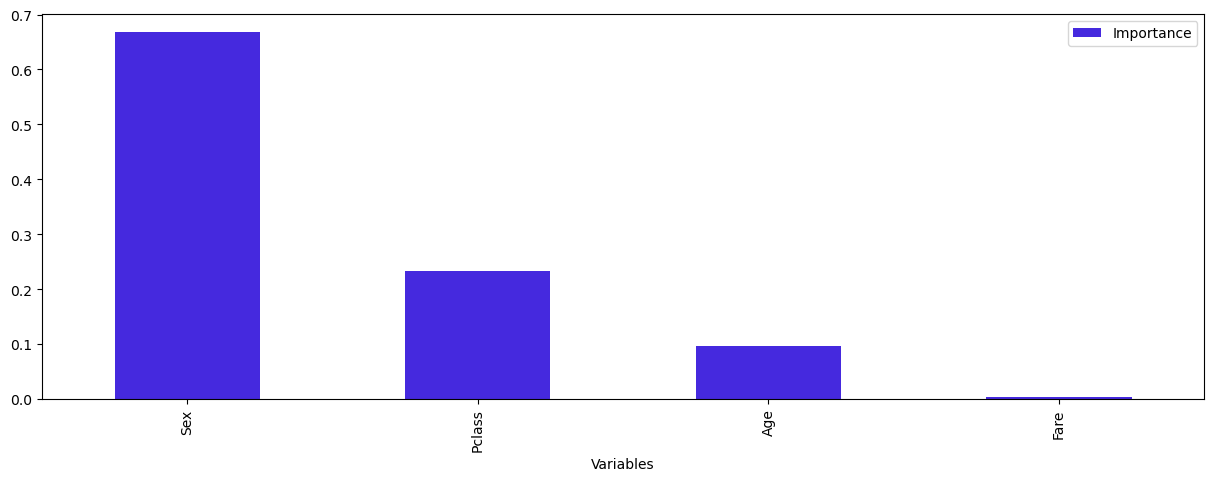

In [52]:
feats = df.drop('Survived', axis=1)

target = df['Survived']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feats,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=42)

# The random_state parameter is used to set the distribution between the training and test sets

print(len(X_train), len(y_train), len(X_test), len(y_test))

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 3, random_state=42)

model.fit(X_train, y_train)

from sklearn.tree import DecisionTreeClassifier

model_min_samples = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 25, random_state=42)

model_min_samples.fit(X_train, y_train)

print('Score on train set', model_min_samples.score(X_train, y_train))

print('Score on test set', model_min_samples.score(X_test, y_test))


%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(40, 20))

print('\n--------------------- Plot_Tree ---------------------')
plot_tree(model_min_samples,
          feature_names=[
              'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
              'Embarked_Q', 'Embarked_S'
          ],
          class_names=['Died', 'Survived'],
          filled=True,
          rounded=True)

plt.show()


print('\n--------------------- Feature_importances ---------------------')
%matplotlib inline

feat_importances = pd.DataFrame({
    "Variables":
    feats.columns,
    "Importance":
    model_min_samples.feature_importances_
}).sort_values(by='Importance', ascending=False)


feat_importances.nlargest(4, "Importance").plot.bar(x="Variables",
                                                    y="Importance",
                                                    figsize=(15, 5),
                                                    color="#4529de");


print('\nfeats.columns =', feats.columns)

print('\nfeature_importances_ =', model_min_samples.feature_importances_)

print('\nDF feat_importances')
print(feat_importances)

In [53]:
from widgets import interactive_MSE

interactive_MSE()

ModuleNotFoundError: No module named 'widgets'

# LinearRegression

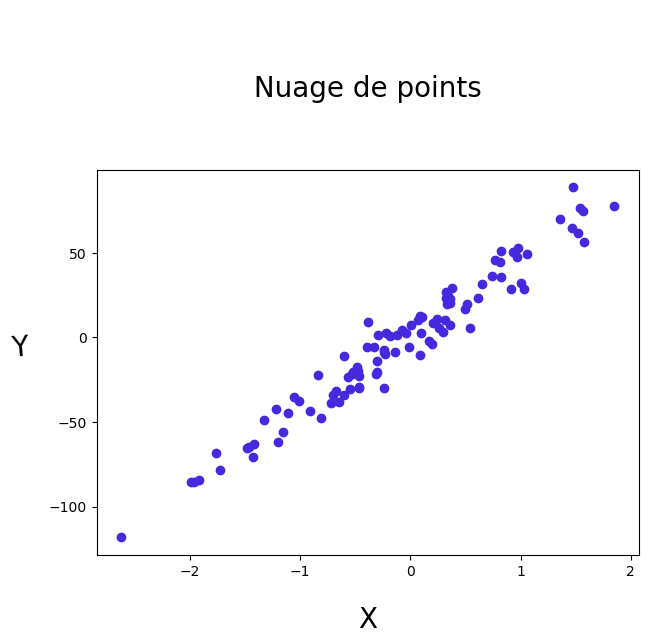

intercept_ =  -0.3634325914496843
coef_      = 44.3350278641543
 𝑦̂ = −0.36 + 44.335 × X 

score train :  0.9568021400619922
score test :  0.9408983055235901

df_error
       y_test  prediction      error
83 -48.949080  -59.248598  10.299518
53  89.033145   65.159041  23.874104
70  44.409196   35.659922   8.749273
45  -5.911314  -17.747558  11.836244
44  -7.624431  -10.744629   3.120198

 MAE = 8.694207566057269
 MSE = 103.47302683438758
 RMSE = 10.17216922953937


In [72]:
%matplotlib inline

from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100,
                       n_features=1,
                       n_informative=1,
                       noise=10,
                       random_state=42)

X = pd.DataFrame(X, columns=["X1"])

y = pd.Series(y)

plt.figure(figsize=(7, 5))

plt.scatter(X, y, color = "#4529de")


plt.title("\n\n Nuage de points \n\n", fontsize=20)

plt.xlabel("X",labelpad=20, fontsize=20)

plt.ylabel("Y", rotation=365, labelpad=20, fontsize=20)

plt.show()

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

print('intercept_ = ', model.intercept_)

print('coef_      =' ,model.coef_[0])

print(' 𝑦̂ = −0.36 + 44.335 × X \n')


predictions = model.predict(X_test)

print("score train : " , model.score(X_train, y_train))

print("score test : ", model.score(X_test, y_test))

df_error = pd.DataFrame({'y_test' : y_test, 
             'prediction' : predictions,
             'error' : abs(y_test - predictions)})

print('\ndf_error')
print(df_error.head())

import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

def metrics(y_test, predictions):
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    
    return print(f'\n MAE = {mae}\n MSE = {mse}\n RMSE = {rmse}')

metrics(y_test, predictions)

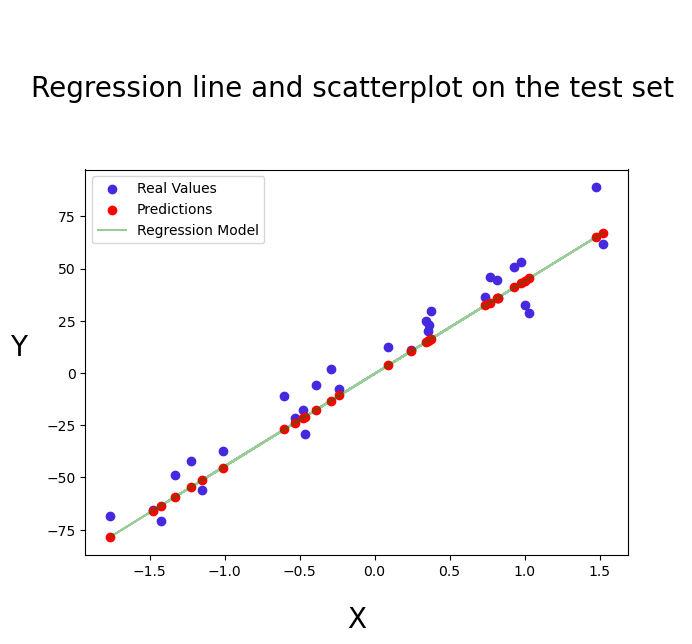

In [75]:
plt.figure(figsize=(7, 5))

plt.scatter(X_test, y_test, color='#4529de', label= 'Real Values')

plt.scatter(X_test, predictions ,color='r', label= 'Predictions')

plt.plot(X_test, predictions ,color='g', alpha=0.4, label= 'Regression Model')

plt.title("\n\nRegression line and scatterplot on the test set \n\n", fontsize=20)

plt.xlabel("X",labelpad=20, fontsize=20)

plt.ylabel("Y", rotation=360, labelpad=20, fontsize=20)

plt.legend()

plt.show()

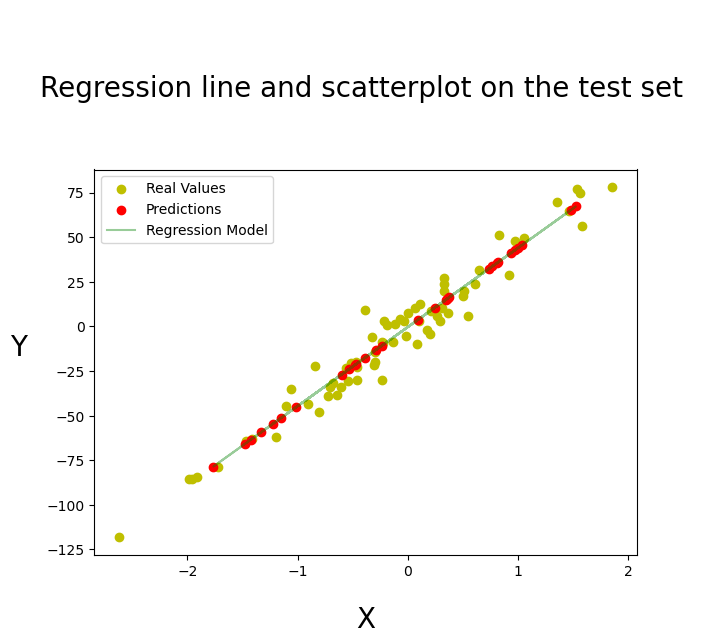

In [78]:
plt.figure(figsize=(7, 5))

plt.scatter(X_train, y_train, color='y', label= 'Real Values')

plt.scatter(X_test, predictions ,color='r', label= 'Predictions')

plt.plot(X_test, predictions ,color='g', alpha=0.4, label= 'Regression Model')

plt.title("\n\nRegression line and scatterplot on the test set \n\n", fontsize=20)

plt.xlabel("X",labelpad=20, fontsize=20)

plt.ylabel("Y", rotation=360, labelpad=20, fontsize=20)

plt.legend()

plt.show()

# Logistic Regression

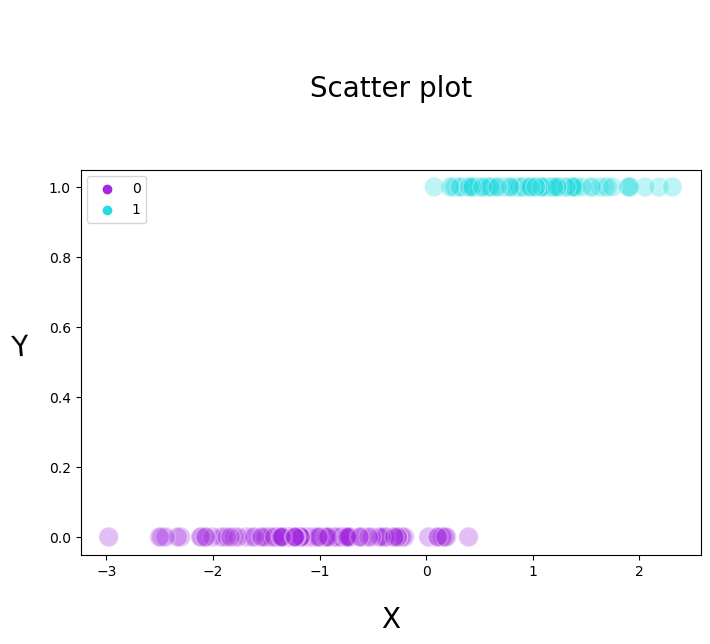

In [84]:
import seaborn as sns

from sklearn.datasets import make_classification

%matplotlib inline

X, y = make_classification(n_samples=200,
                           n_features=1,
                           n_clusters_per_class=1,
                           n_informative=1,
                           n_repeated=0,
                           n_redundant=0,
                           shuffle=True,
                           random_state=42)

X = pd.DataFrame(X, columns=["X"])

y = pd.Series(y)

fig = plt.figure(figsize=(8, 5))

sns.scatterplot(data=X,
                x=X["X"],
                y=y,
                hue=y,
                s=200,
                alpha=0.3,
                palette=["#a329de", "#26dbe0"],
                legend='full')

plt.title("\n\n Scatter plot \n\n", fontsize=20)

plt.xlabel("X", labelpad=20, fontsize=20)

plt.ylabel("Y", rotation=365, labelpad=20, fontsize=20)

plt.show()

In [85]:
X.head()

,X
0,-1.529872
1,0.892394
2,1.143009
3,1.103094
4,1.047986


In [86]:
y[:5]

0    0
1    1
2    1
3    1
4    1
dtype: int64

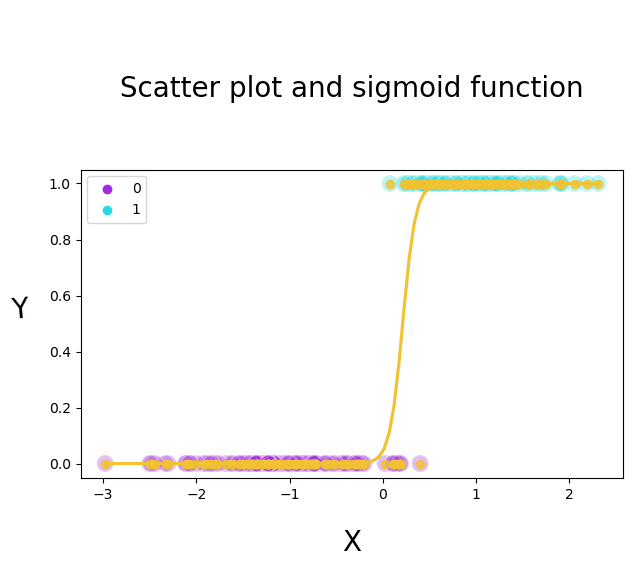

In [89]:
%matplotlib inline

fig = plt.figure(figsize=(7, 4))

sns.scatterplot(data=X,
                x=X["X"],
                y=y,
                hue=y,
                s=150,
                alpha=0.3,
                palette=["#a329de", "#26dbe0"],
                legend='full')

sns.regplot(data=X, x=X["X"], y=y, logistic=True, ci=None, color="#f1c232")

plt.xlabel("X", fontsize=20, labelpad=20)

plt.ylabel("Y", fontsize=20, rotation=365, labelpad=20)

plt.title("\n\n Scatter plot and sigmoid function \n\n", fontsize=20)

plt.show()

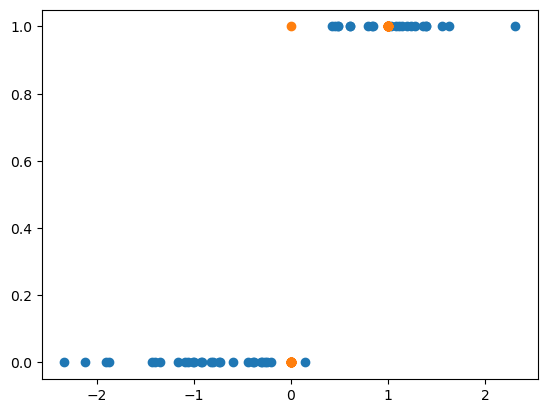

In [117]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

preds = model.predict(X_test)

preds_proba = model.predict_proba(X_test)

#plt.scatter(y_test, preds)

plt.scatter(X_test, y_test)

plt.scatter(y_test, preds)

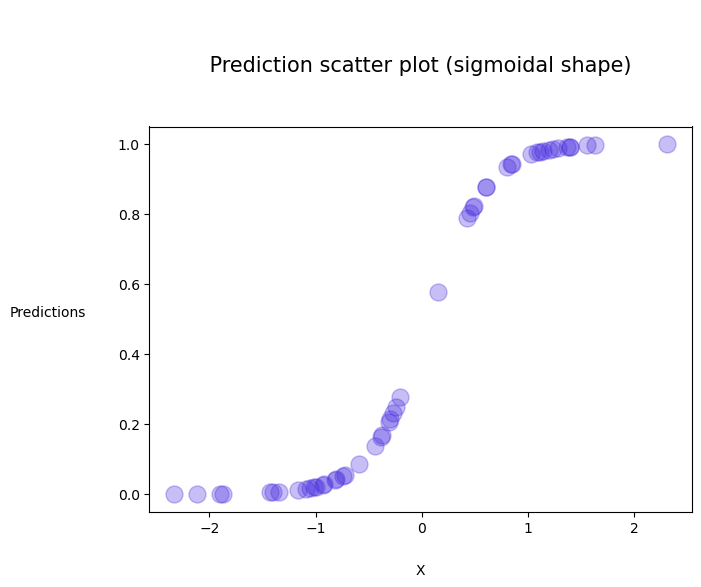

0    0.000380
1    0.987920
2    0.248602
3    0.231259
4    0.000929
Name: 1, dtype: float64

In [126]:
#(1)

preds = model.predict(X_test)

#(2)

preds_proba = model.predict_proba(X_test)

# We keep only the probabilities of class 1

preds_proba = pd.DataFrame(preds_proba).iloc[:,1]

#(3)

plt.figure(figsize=(7, 5))

plt.scatter(X_test, preds_proba, color="#4529de", s=150,  alpha=0.3)

plt.xlabel("X", fontsize=10, labelpad=20)

plt.ylabel("Predictions", fontsize=10, labelpad=50, rotation=360)

plt.title("\n\n Prediction scatter plot (sigmoidal shape) \n\n", fontsize=15)

plt.show()

preds_proba.head()

In [143]:
def score(y_test, preds):
    from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
    
    return (accuracy_score(y_test, preds), precision_score(y_test, preds),
            recall_score(y_test, preds), confusion_matrix(y_test, preds))

score(y_test, preds)

(0.98,
 0.9565217391304348,
 1.0,
 array([[27,  1],
        [ 0, 22]]))

In [144]:
def metrics_class(y_test, preds):
    df = pd.DataFrame({'true': y_test,
                       'preds': preds,
                       'diff': y_test - preds})

    df['cf'] = ''

    df.loc[(df['true'] == 0) & (df['preds'] == 0), 'cf'] = 'TN'
    df.loc[(df['true'] == 0) & (df['preds'] == 1), 'cf'] = 'FP'
    df.loc[(df['true'] == 1) & (df['preds'] == 0), 'cf'] = 'FN'
    df.loc[(df['true'] == 1) & (df['preds'] == 1), 'cf'] = 'TP'

    return df

df_m = metrics_class(y_test, preds)
df_m.head()

,true,preds,diff,cf
95,0,0,0,TN
15,1,1,0,TP
30,0,0,0,TN
158,0,0,0,TN
128,0,0,0,TN


In [145]:
from sklearn.metrics import classification_report

print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        28
           1       0.96      1.00      0.98        22

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50

